## Importing Libraries

In [9]:
# General Data Processing and Mathematical Libraries
import numpy as np  # for linear algebra and numerical operations
import pandas as pd  # for data manipulation and analysis
import math  # for mathematical operations (e.g., calculating log, square roots)
import matplotlib.pyplot as plt  # for data visualization (creating plots and charts)
import seaborn as sns  # for statistical data visualization and enhanced plots
import tensorflow as tf  # for deep learning model creation and training
from tensorflow.keras.models import Model, Sequential  # for building and managing models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D  # for layers
from tensorflow.keras.optimizers import Adam  # for optimization algorithms
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler  # for callbacks during training
from tensorflow.keras import regularizers  # for adding regularization to layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # for image augmentation and manipulation
from tensorflow.keras.preprocessing import image as keras_image  # for image-related utilities like load_img and img_to_array
from sklearn.model_selection import train_test_split, StratifiedKFold  # for splitting data into training and validation sets
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc  # for model evaluation and metrics
from tensorflow.keras.models import load_model  # for loading pre-trained models
import time  # for measuring execution time
from keras.preprocessing import image
from ctransformers import AutoModelForCausalLM  # for loading language models

## Responder

In [3]:
folder_path = "/kaggle/input/rtms-dataset/SSWE/responder"  # Path to the folder containing images
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  # Supported image file extensions
all_files = os.listdir(folder_path)  # Get the list of all files in the folder
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]  # Filter out only the image files
num_images = len(image_files)  # Count the number of images
print(f"Number of images in {folder_path}: {num_images}")  # Print the number of images

Number of images in /kaggle/input/small-private-cwt-dataset/CWT/responder: 2565


## Non-Responder

In [4]:
folder_path = "/kaggle/input/rtms-dataset/SSWE/Nonresponder"  # Path to the folder containing images
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  # Supported image file extensions
all_files = os.listdir(folder_path)  # Get the list of all files in the folder
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]  # Filter out only the image files
num_images = len(image_files)  # Count the number of images
print(f"Number of images in {folder_path}: {num_images}")  # Print the number of images

Number of images in /kaggle/input/small-private-cwt-dataset/CWT/Nonresponder: 1577


## Total Number of images

In [5]:
Responders = 2565
Non_Responders = 1577

Total_Dataset_images  = Responders+Non_Responders
print("Total Number of images",Total_Dataset_images)

Total Number of images 4142


In [6]:
base_path = "/kaggle/input/rtms-dataset/SSWE"  # Define the base path
paths = []  # Initialize list to store file paths
labels = []  # Initialize list to store labels

# Traverse through the folders and collect paths and labels
for folder in ["responder", "Nonresponder"]:  # Iterate over the target folders
    folder_path = os.path.join(base_path, folder)  # Construct folder path
    for file in os.listdir(folder_path):  # Iterate through files in the folder
        file_path = os.path.join(folder_path, file)  # Construct file path
        paths.append(file_path)  # Append file path to the list
        labels.append(folder)  # Append folder name as label to the list

df = pd.DataFrame({"path": paths, "label": labels})  # Create a DataFrame
df  # Display the DataFrame

,path,label
0,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder
1,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder
2,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder
3,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder
4,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder
...,...,...
4137,/kaggle/input/small-private-cwt-dataset/CWT/No...,Nonresponder
4138,/kaggle/input/small-private-cwt-dataset/CWT/No...,Nonresponder
4139,/kaggle/input/small-private-cwt-dataset/CWT/No...,Nonresponder
4140,/kaggle/input/small-private-cwt-dataset/CWT/No...,Nonresponder


In [7]:
df["label"].value_counts()

label
responder       2565
Nonresponder    1577
Name: count, dtype: int64

In [8]:
df.to_csv("rTMS_Dataset_CWT.csv", index=False)

In [ ]:
df = pd.read_csv("rTMS_Dataset_CWT.csv")
df.head()

,path,label
0,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder
1,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder
2,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder
3,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder
4,/kaggle/input/small-private-cwt-dataset/CWT/re...,responder


In [10]:
df["label"].value_counts()

label
responder       2565
Nonresponder    1577
Name: count, dtype: int64

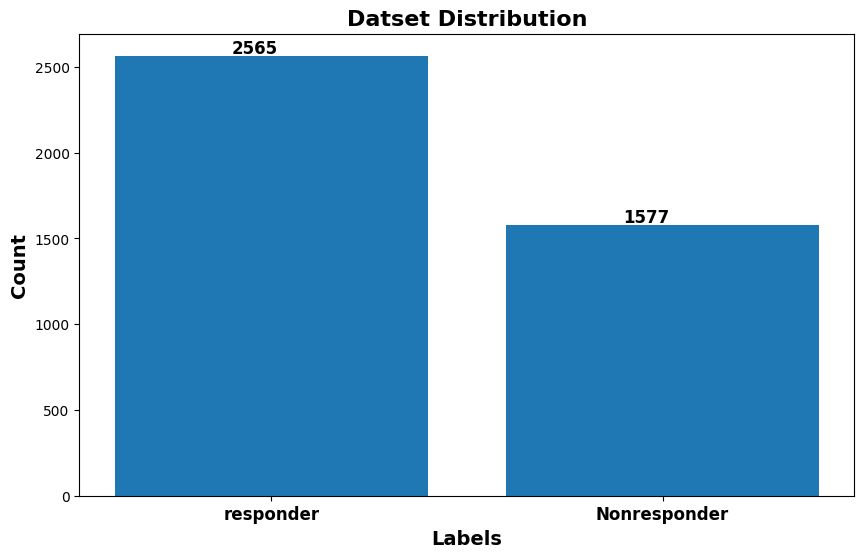

In [11]:
label_counts = df["label"].value_counts()  # Count occurrences of each label

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes for the plot
bars = plt.bar(label_counts.index, label_counts.values, linewidth=1.5)  # Create a bar plot

plt.xlabel('Labels', fontsize=14, fontweight='bold')  # Set x-axis label with custom font size and weight
plt.ylabel('Count', fontsize=14, fontweight='bold')  # Set y-axis label with custom font size and weight
plt.xticks(fontsize=12, fontweight='bold')  # Customize x-tick labels size and make them bold

# Add text labels on top of each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 15, str(count), fontsize=12, fontweight='bold')

# Add a border to the bars
for bar in bars:
    bar.set_linewidth(1.5)

plt.title('Dataset Distribution', fontsize=16, fontweight='bold')  # Add a title to the plot
plt.show()  # Display the plot

## Splitting Training and Testing¶

In [ ]:
# Calculate the number of images for each class in the test set

test_size_percent = 0.1
num_responders_test = math.ceil(2565 * test_size_percent)  # Round to the nearest integer
num_non_responders_test = math.ceil(1577 * test_size_percent)  # Round to the nearest integer

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=test_size_percent, stratify=df['label'], random_state=42)

# Displaying the shapes of the resulting DataFrames
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

print("\n")

# Print the number of images in each class for the train set
print("Number of Responders in Train Set:", 2565-num_responders_test)
print("Number of Non_Responders in Train Set:", 1577-num_non_responders_test)
print("\n")

# Print the number of images in each class for the test set
print("Number of Responders in Test Set:", num_responders_test)
print("Number of Non_Responders in Test Set:", num_non_responders_test)

Train set shape: (3727, 2)
Test set shape: (415, 2)


Number of Responders in Train Set: 2308
Number of Non_Responders in Train Set: 1419


Number of Responders in Test Set: 257
Number of Non_Responders in Test Set: 158


## Splitting Training and Validation

In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Set up StratifiedKFold with 5 folds

fold_train_dfs = []  # Initialize list to store training sets for each fold
fold_val_dfs = []  # Initialize list to store validation sets for each fold

# Split the training set into 5 folds
for train_index, val_index in skf.split(train_df['path'], train_df['label']):  
    train_fold = train_df.iloc[train_index]  # Get training set for the current fold
    val_fold = train_df.iloc[val_index]  # Get validation set for the current fold
    fold_train_dfs.append(train_fold)  # Append training set to the list
    fold_val_dfs.append(val_fold)  # Append validation set to the list

# Print the class distribution for each fold
for fold, (train_fold, val_fold) in enumerate(zip(fold_train_dfs, fold_val_dfs), 1):
    print(f"Fold {fold} - Training Set Class Distribution:")  # Training set distribution
    print(train_fold['label'].value_counts())
    print(f"\nFold {fold} - Validation Set Class Distribution:")  # Validation set distribution
    print(val_fold['label'].value_counts())
    print("\n" + "-"*40)  # Separator for better readability

Fold 1 - Training Set Class Distribution:
label
responder       1846
Nonresponder    1135
Name: count, dtype: int64

Fold 1 - Validation Set Class Distribution:
label
responder       462
Nonresponder    284
Name: count, dtype: int64

----------------------------------------
Fold 2 - Training Set Class Distribution:
label
responder       1846
Nonresponder    1135
Name: count, dtype: int64

Fold 2 - Validation Set Class Distribution:
label
responder       462
Nonresponder    284
Name: count, dtype: int64

----------------------------------------
Fold 3 - Training Set Class Distribution:
label
responder       1847
Nonresponder    1135
Name: count, dtype: int64

Fold 3 - Validation Set Class Distribution:
label
responder       461
Nonresponder    284
Name: count, dtype: int64

----------------------------------------
Fold 4 - Training Set Class Distribution:
label
responder       1847
Nonresponder    1135
Name: count, dtype: int64

Fold 4 - Validation Set Class Distribution:
label
responde

## Create Data Generators

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

## CNN Model

In [ ]:
# Define a simple CNN model
def cnn_model():
    model = Sequential()
    
    # First convolutional layer with 4 filters, kernel size 3x3, and ReLU activation
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())  # Batch normalization to stabilize training

    # Second convolutional layer with 8 filters
    model.add(Conv2D(12, (3, 3), activation='relu'))
    model.add(BatchNormalization())

    # Flatten the output from the convolutional layers to feed into the Dense layer
    model.add(Flatten())
    
    # Add dropout layer to reduce overfitting
    model.add(Dropout(0.25))  # Dropout with a rate of 0.3

    # Dense layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))
   
    # Compile the model with Adam optimizer and a low learning rate for stable learning
    learning_rate = 0.0001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [17]:
# Create model
model = cnn_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 12)   │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 220, 220, 12)   │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 580800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 580800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       580,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581,981 (2.22 MB)

 Trainable params: 581,941 (2.22 MB)

 Non-trainable params: 40 (160.00 B)

## Model Training and Evaluation with Time Tracking and Performance Visualization

In [19]:
# Initialize EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Fold 1
Start Time: 2024-12-09 23:06:20
Found 2981 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 746 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733785586.242859      95 service.cc:145] XLA service 0x7ff760003700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733785586.242930      95 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733785586.242936      95 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/94 ━━━━━━━━━━━━━━━━━━━━ 13:02 8s/step - accuracy: 0.2812 - loss: 1.8166

I0000 00:00:1733785591.384729      95 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 265ms/step - accuracy: 0.5983 - loss: 4.6471 - val_accuracy: 0.6890 - val_loss: 0.6186
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.7963 - loss: 0.5196 - val_accuracy: 0.6555 - val_loss: 0.5759
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.9586 - loss: 0.1175 - val_accuracy: 0.6461 - val_loss: 0.6047
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.9555 - loss: 0.1094 - val_accuracy: 0.6273 - val_loss: 0.8328
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.9786 - loss: 0.0655 - val_accuracy: 0.8525 - val_loss: 0.3287
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.9841 - loss: 0.0523 - val_accuracy: 0.8968 - val_loss: 0.2448
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9979 - loss: 0.0158 - val_accuracy: 0.9705 - val_loss: 0.1146
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9955 - loss: 0.0200 - val_accuracy: 0.962

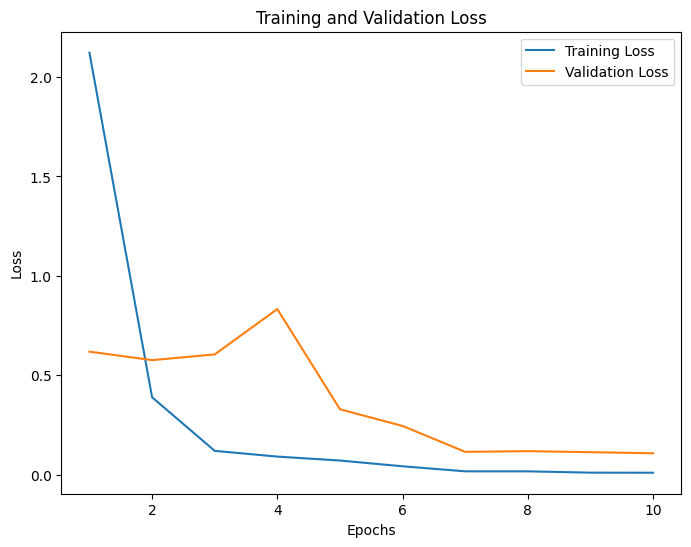

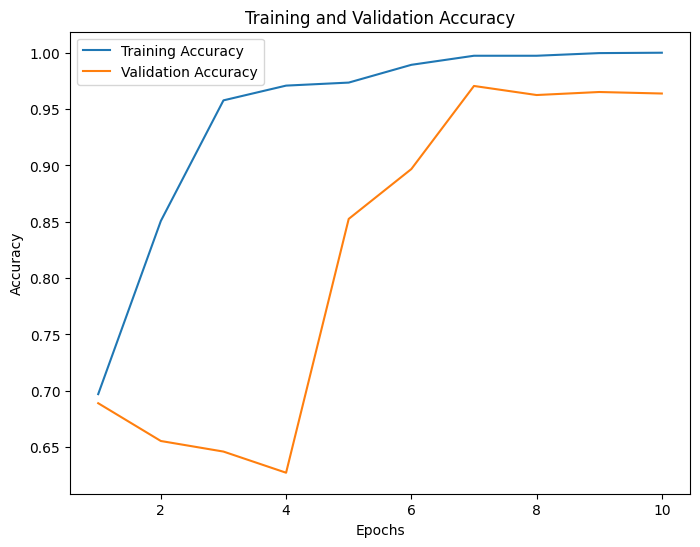

Fold 2
Start Time: 2024-12-09 23:08:58
Found 2981 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 746 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.9793 - loss: 0.0723 - val_accuracy: 0.9987 - val_loss: 0.0220
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9941 - loss: 0.0353 - val_accuracy: 0.9987 - val_loss: 0.0088
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.9999 - loss: 0.0066 - val_accuracy: 0.9987 - val_loss: 0.0236
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9994 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9973 - val_loss: 0.0107
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9987 - val_loss: 0.0051
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9987 - val_loss: 0.0049
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9997 - loss: 0.0039 - val_accuracy: 0.998

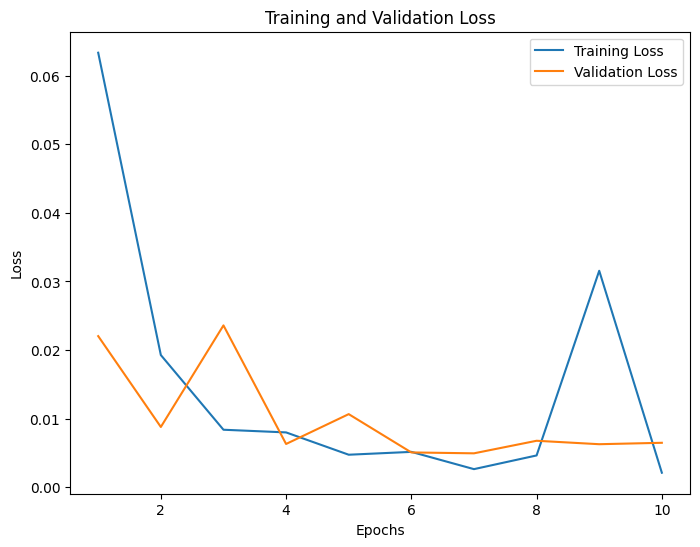

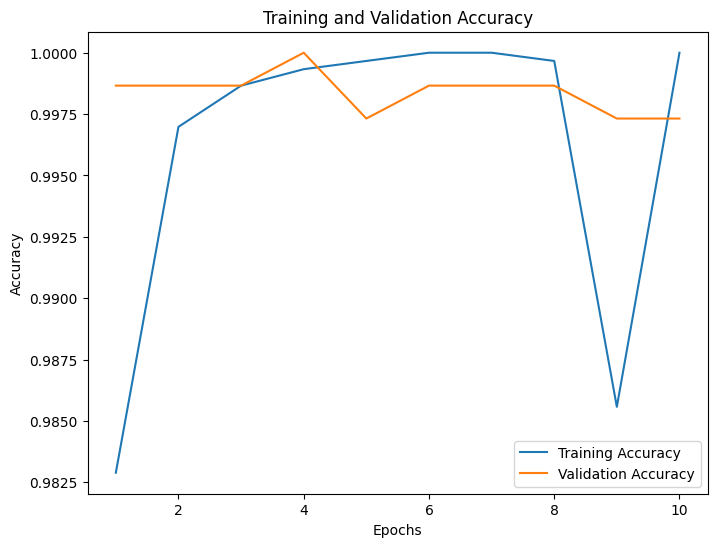

Fold 3
Start Time: 2024-12-09 23:11:12
Found 2982 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 745 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.9996 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9545 - loss: 0.1498 - val_accuracy: 0.7436 - val_loss: 1.2128
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9903 - loss: 0.0371 - val_accuracy: 0.9960 - val_loss: 0.0101
End Time: 2024-12-09 23:12:35
Elapsed Time for Fold 3: 82.97 seconds

Training Loss: [0.005393442697823048, 0.0036445604637265205, 0.0027919679414480925, 0.0020971684716641903, 0.15759482979774475, 0.012698058038949966]
Validation Loss: 

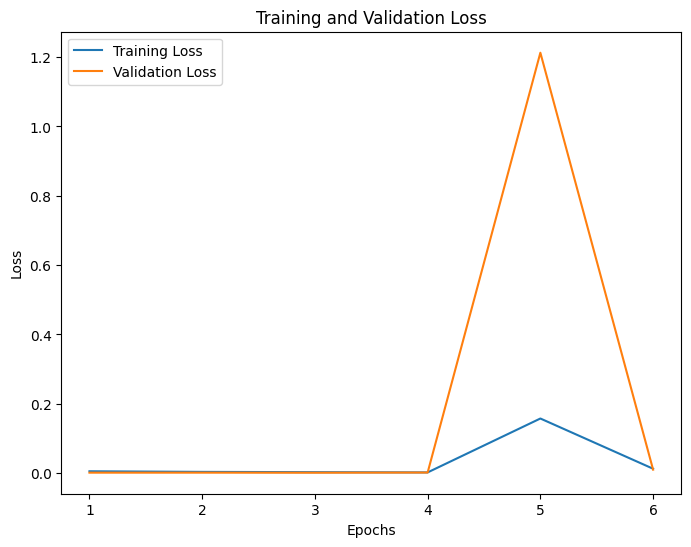

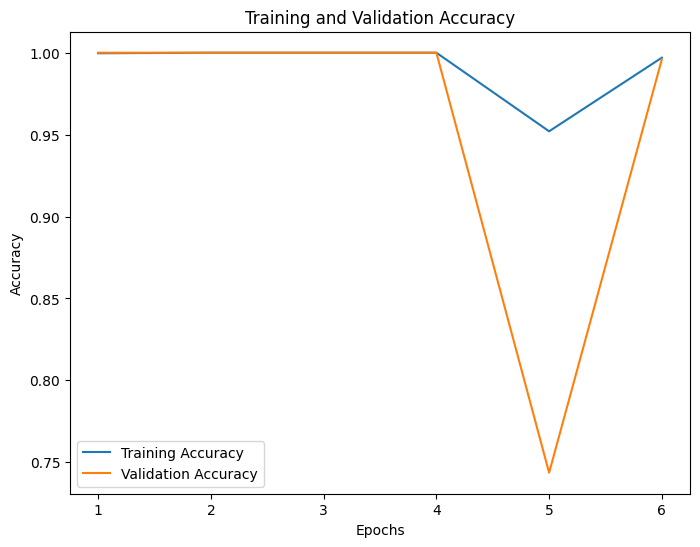

Fold 4
Start Time: 2024-12-09 23:12:36
Found 2982 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 745 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 9.2850e-04
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 8.0225e-04
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 9.1614e-04
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
End Time: 2024-12-09 23:14:04
Elapsed Time for Fold 4: 88.03 seconds

Training Loss: [0.002668095054104924, 0.002400705125182867, 0.0017914948984980583, 0.0019902302883565426, 0.0015800901455804706, 0.001243800506927073]
Vali

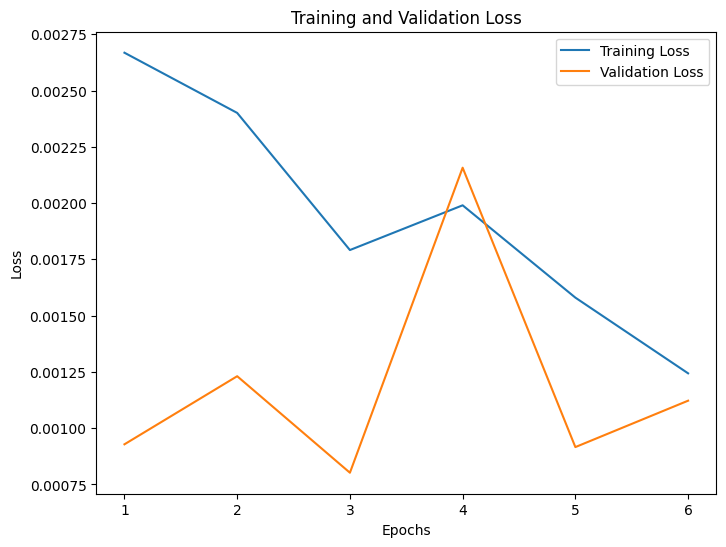

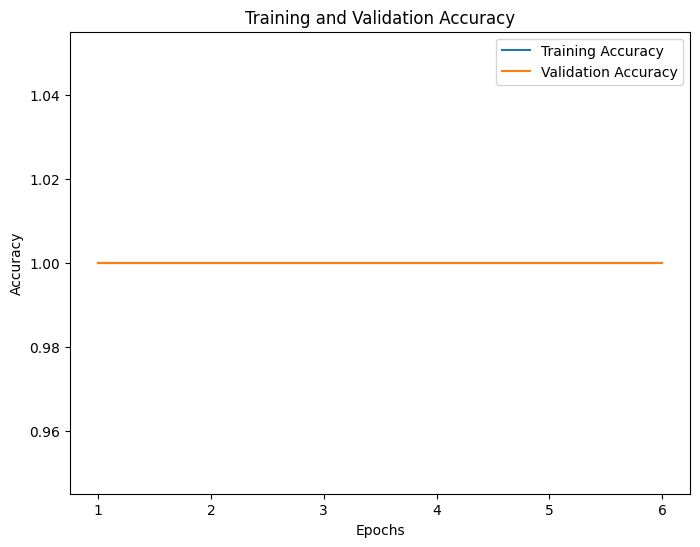

Fold 5
Start Time: 2024-12-09 23:14:04
Found 2982 validated image filenames belonging to 2 classes.
train_generator classes {'Nonresponder': 0, 'responder': 1}
Found 745 validated image filenames belonging to 2 classes.
val_generator classes {'Nonresponder': 0, 'responder': 1}
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.9999 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 8.1469e-04
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 8.8636e-04
End Time: 2024-12-09 23:14:44
Elapsed Time for Fold 5: 40.30 seconds

Training Loss: [0.0034846465568989515, 0.001621488481760025, 0.0011292503913864493]
Validation Loss: [0.001481240033172071, 0.0008146935142576694, 0.0008863550028763711]
Training Accuracy: [0.9996646642684937, 1.0, 1.0]
Validation Accuracy: [1.0, 1.0, 1.0]


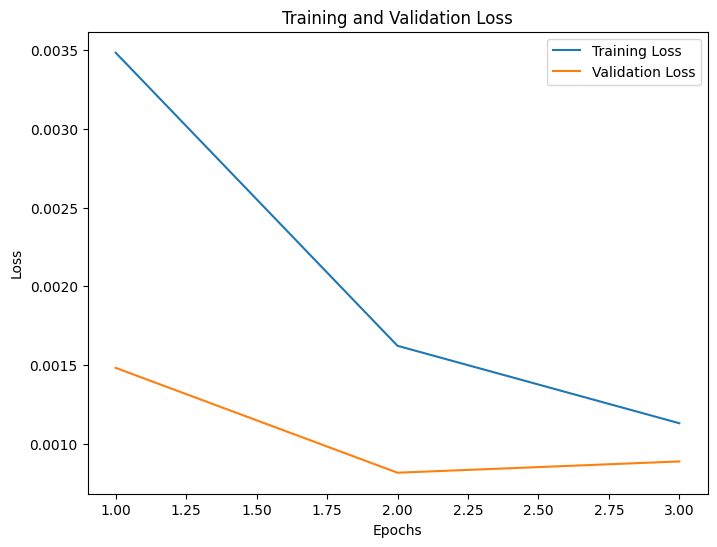

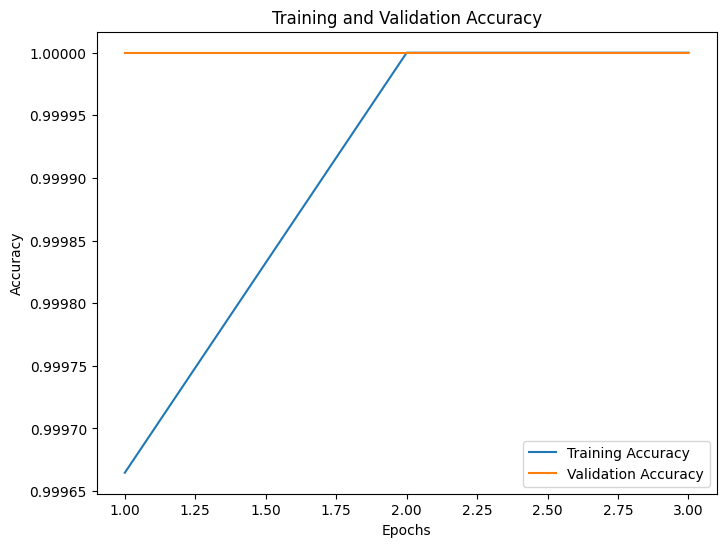

Total Training Time: 502.17 seconds


In [20]:
# Number of epochs and batch size
epochs = 10
batch_size = 32

# Initialize lists to store loss and accuracy values
all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

# Initialize lists to store start and end times
all_start_times = []
all_end_times = []

# Loop through the folds and fit the model
for i in range(5):
    print("Fold", i + 1)

    # Record the start time for the current fold
    start_time = time.time()
    all_start_times.append(start_time)
    print("Start Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

    # Get the current fold's training and validation sets
    fold_train = fold_train_dfs[i]
    fold_val = fold_val_dfs[i]

    # Training generator
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=fold_train,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("train_generator classes", train_generator.class_indices)

    # Validation generator
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=fold_val,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("val_generator classes", val_generator.class_indices)

    # Fit the model on the current fold's training and validation data
    history = model.fit(
        train_generator,
        epochs=epochs,
        verbose=1,
        validation_data=val_generator,
        callbacks=[early_stop]
    )

    # Record the end time for the current fold
    end_time = time.time()
    all_end_times.append(end_time)
    print("End Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))

    # Calculate and print the elapsed time for the current fold
    elapsed_time = end_time - start_time
    print("Elapsed Time for Fold {}: {:.2f} seconds\n".format(i + 1, elapsed_time))

    # Print the training and validation loss and accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    print("Training Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)

    # Append the loss and accuracy values to the lists
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)
    all_train_acc.append(train_acc)
    all_val_acc.append(val_acc)

    # Plot the training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(history.epoch) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(history.epoch) + 1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Calculate and print the total training time
total_training_time = sum(all_end_times) - sum(all_start_times)
print("Total Training Time: {:.2f} seconds".format(total_training_time))

In [ ]:
# Calculate and print the average loss and accuracy
avg_train_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_train_loss]  # Calculate average training loss for each epoch
avg_val_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_val_loss]  # Calculate average validation loss for each epoch
avg_train_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_train_acc]  # Calculate average training accuracy for each epoch
avg_val_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_val_acc]  # Calculate average validation accuracy for each epoch

print("Average Training Loss:", avg_train_loss)  # Print average training loss
print("Average Validation Loss:", avg_val_loss)  # Print average validation loss
print("Average Training Accuracy:", avg_train_acc)  # Print average training accuracy
print("Average Validation Accuracy:", avg_val_acc)  # Print average validation accuracy

Average Training Loss: [0.28871853854507207, 0.014985103136859834, 0.030703337901892763, 0.0019457360031083226, 0.002078461810015142]
Average Validation Loss: [0.3658586047589779, 0.0100955153349787, 0.20475831272779033, 0.0011929137981496751, 0.0010607628501020372]
Average Training Accuracy: [0.9433411657810211, 0.9962764203548431, 0.991448700428009, 1.0, 0.9998882214228312]
Average Validation Accuracy: [0.8229222595691681, 0.9983914077281952, 0.9565995534261068, 1.0, 1.0]


In [ ]:
# Calculate and print the average loss and accuracy
mean_train_loss = sum(avg_train_loss) / len(avg_train_loss)  # Calculate the mean of average training losses
mean_val_loss = sum(avg_val_loss) / len(avg_val_loss)  # Calculate the mean of average validation losses
mean_train_acc = sum(avg_train_acc) / len(avg_train_acc)  # Calculate the mean of average training accuracies
mean_val_acc = sum(avg_val_acc) / len(avg_val_acc)  # Calculate the mean of average validation accuracies

print("Mean Training Loss:", mean_train_loss)  # Print the mean training loss
print("Mean Validation Loss:", mean_val_loss)  # Print the mean validation loss
print("Mean Training Accuracy:", mean_train_acc)  # Print the mean training accuracy
print("Mean Validation Accuracy:", mean_val_acc)  # Print the mean validation accuracy

Mean Training Loss: 0.06768623547938964
Mean Validation Loss: 0.11659322189399975
Mean Training Accuracy: 0.986190901597341
Mean Validation Accuracy: 0.955582644144694


## Model Evaluation on Test Set

In [23]:
# Record the start time of the evaluation process
start_time = time.time()  

# Set the test set as the final evaluation set
evaluation_set = test_df  

# Print the length of the evaluation set
print("Evaluation set length:", len(evaluation_set))  

# Create a data generator for the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,  # DataFrame containing evaluation data
    x_col='path',  # Column with image paths
    y_col='label',  # Column with labels
    target_size=(224, 224),  # Resize images to the specified dimensions
    batch_size=batch_size,  # Batch size for evaluation
    seed=1234,  # Seed for reproducibility
    shuffle=False,  # Do not shuffle the evaluation set
    class_mode='binary'  # Specify binary classification
)

# Print the class indices for the evaluation generator
print("evaluation_generator classes", evaluation_generator.class_indices)  

# Evaluate the model on the evaluation generator
evaluation_loss, evaluation_accuracy = model.evaluate(evaluation_generator)  

end_time = time.time()  # Record the end time of the evaluation process

# Calculate and print the elapsed time for evaluation
elapsed_time = end_time - start_time  
print("Time taken for evaluation:", elapsed_time, "seconds")  

# Print evaluation metrics
print("Evaluation Loss:", evaluation_loss)  
print("Evaluation Accuracy:", evaluation_accuracy)  

Evaluation set length: 415
Found 415 validated image filenames belonging to 2 classes.
evaluation_generator classes {'Nonresponder': 0, 'responder': 1}
 1/13 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.9688 - loss: 0.0794

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.9763 - loss: 0.0698
Time taken for evaluation: 3.7949254512786865 seconds
Evaluation Loss: 0.07587376981973648
Evaluation Accuracy: 0.9734939932823181


## Save Trained Model

In [ ]:
# # After training, save the model
model.save('Saved_Models/CNN_CWT_97_34.h5')

print("Model saved successfully")

Model saved successfully


## Performance Metrics

## Model Evaluation: Confusion Matrix and Classification Report¶

In [25]:
# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)  # Get predictions on the evaluation set
evaluation_pred_classes = (evaluation_predictions > 0.5).astype(int)  # Convert predictions to binary class (0 or 1)

# Get true labels
true_labels = evaluation_generator.classes  

# Class names for interpretation
class_names = ['Non_Responders', 'Responders']  

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, evaluation_pred_classes)  
print("Confusion Matrix:")
print(conf_matrix)  # Print the confusion matrix

# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes, target_names=class_names)  
print("Classification Report:")
print(class_report)  # Print the classification report

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step
Confusion Matrix:
[[150   8]
 [  3 254]]
Classification Report:
                precision    recall  f1-score   support

Non_Responders       0.98      0.95      0.96       158
    Responders       0.97      0.99      0.98       257

      accuracy                           0.97       415
     macro avg       0.97      0.97      0.97       415
  weighted avg       0.97      0.97      0.97       415



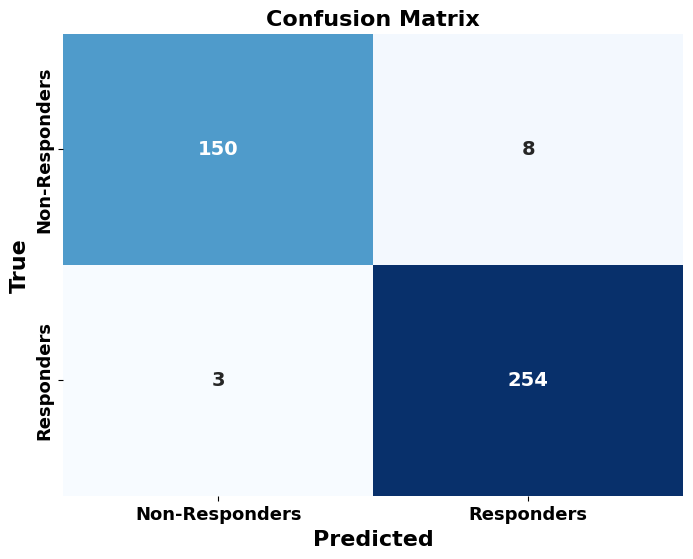

In [26]:
def plot_confusion_matrix(conf_matrix, class_names):  # Function to plot confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a subplot

    # Increase font size for true and predicted labels
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names, ax=ax, annot_kws={"size": 14, "weight": "bold"})  # Annotate values with bold font

    # Increase font size and make class labels bold
    ax.set_xticklabels(class_names, fontsize=13, weight='bold')  # Set x-axis labels
    ax.set_yticklabels(class_names, fontsize=13, weight='bold')  # Set y-axis labels

    plt.xlabel('Predicted', fontsize=16, weight='bold')  # Increase font size and weight for x label
    plt.ylabel('True', fontsize=16, weight='bold')  # Increase font size and weight for y label
    plt.title('Confusion Matrix', fontsize=16, weight='bold')  # Increase font size and weight for title
    plt.show()  # Display the plot

# Confusion matrix (conf_matrix) and class names
class_names = ['Non-Responders', 'Responders']  # Define class names
plot_confusion_matrix(conf_matrix, class_names)  # Call the function to plot the confusion matrix


## Detailed Performance Metrics Analysis: Confusion Matrix, Class-Specific Precision, Recall, Specificity, and F1-Score

In [27]:
# confusion matrix (conf_matrix) and class names

class_names = ['Non_Responders', 'Responders']  # Define class names

# Print confusion matrix with counts
for i in range(len(class_names)):  # Iterate through each class
    print(f"\nClass: {i} ({class_names[i]})")  # Print the class label
    true_positives = conf_matrix[i, i]  # True Positives
    true_negatives = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))  # True Negatives
    false_positives = np.sum(conf_matrix[:, i]) - true_positives  # False Positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives  # False Negatives

    # Print counts for each metric
    print(f"True Positives (TP): {true_positives}")
    print(f"True Negatives (TN): {true_negatives}")
    print(f"False Positives (FP): {false_positives}")
    print(f"False Negatives (FN): {false_negatives}")
    print("====================")

# Calculate and print overall metrics
overall_accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)  # Overall Accuracy
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)  # Precision
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)  # Recall

# Print overall metrics
print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Class: 0 (Non_Responders)
True Positives (TP): 150
True Negatives (TN): 254
False Positives (FP): 3
False Negatives (FN): 8

Class: 1 (Responders)
True Positives (TP): 254
True Negatives (TN): 150
False Positives (FP): 8
False Negatives (FN): 3

Overall Metrics:
Overall Accuracy: 0.9734939759036144
Precision: [0.98039216 0.96946565]
Recall: [0.94936709 0.98832685]


In [28]:
# confusion matrix (conf_matrix) and class names

class_names = ['Non_Responders', 'Responders']  # Define class names

# Print class-specific metrics
for i in range(len(class_names)):  # Iterate through each class
    # Calculate precision, recall, specificity, and F1-score for each class
    precision = conf_matrix[i, i] / np.sum(conf_matrix[:, i]) if np.sum(conf_matrix[:, i]) != 0 else 0  # Precision
    recall = conf_matrix[i, i] / np.sum(conf_matrix[i, :]) if np.sum(conf_matrix[i, :]) != 0 else 0  # Recall
    specificity = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1)) / (np.sum(conf_matrix) - np.sum(conf_matrix[:, i]) - np.sum(conf_matrix[i, :]) + conf_matrix[i, i])  # Specificity
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0  # F1-score

    # Print metrics for the current class
    print(f"\nClass: {class_names[i]}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print("====================")




Class: Non_Responders
Precision: 0.9804
Recall: 0.9494
Specificity: 1.0000
F1-score: 0.9646

Class: Responders
Precision: 0.9695
Recall: 0.9883
Specificity: 1.0000
F1-score: 0.9788


## ROC Curve Analysis: Evaluating Model Performance Using AUC for Classification Accuracy

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step


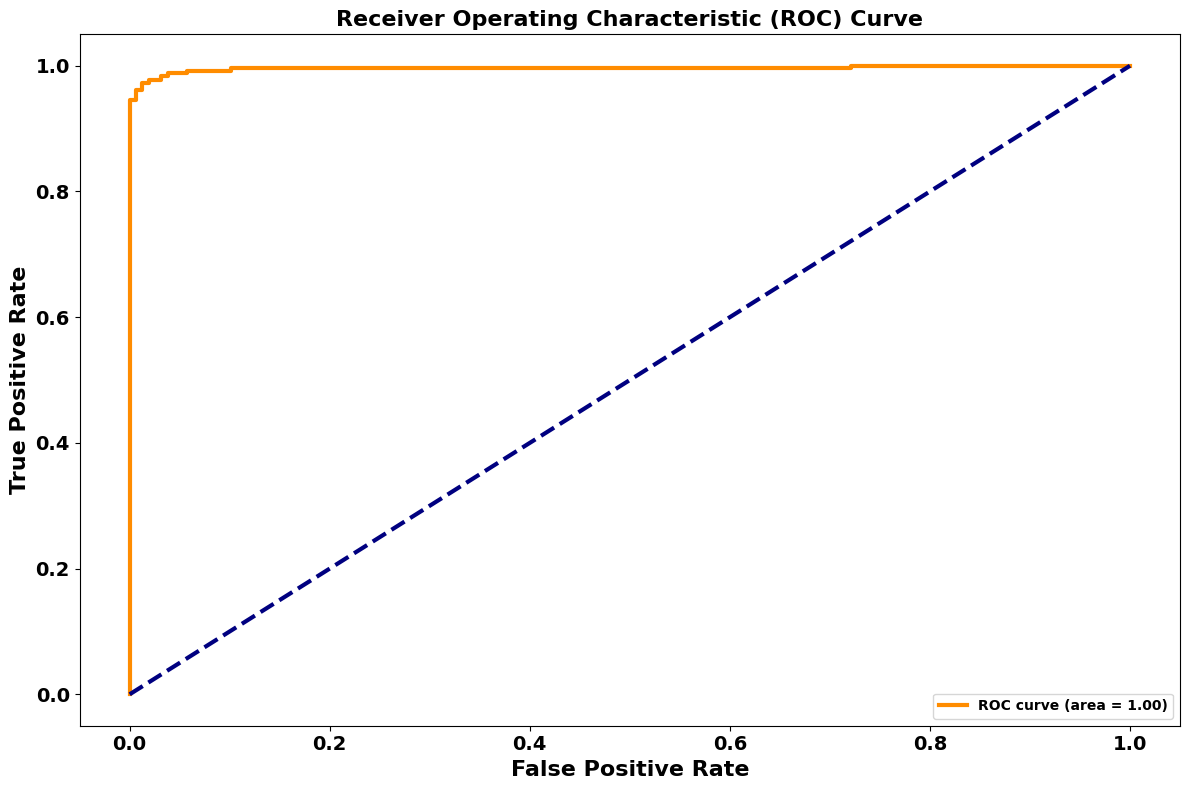

In [29]:
true_labels = evaluation_generator.classes  # Get true labels from the generator
predicted_probabilities = model.predict(evaluation_generator)  # Get predicted probabilities from the model

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)  # Compute False Positive Rate and True Positive Rate
roc_auc = auc(fpr, tpr)  # Calculate the AUC (Area Under the Curve)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))  # Set figure size
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (area = {:.2f})'.format(roc_auc))  # Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')  # Plot diagonal line (random classifier)

# Adjust label and title properties
plt.xlabel('False Positive Rate', fontsize=16, weight='bold')  # X-axis label
plt.ylabel('True Positive Rate', fontsize=16, weight='bold')  # Y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, weight='bold')  # Plot title
plt.legend(loc='lower right', fontsize=14, title_fontsize=14, fancybox=True, framealpha=0.7, edgecolor='black')  # Legend properties

# Adjust tick properties
plt.xticks(fontsize=14, fontweight='bold')  # X-axis ticks
plt.yticks(fontsize=14, fontweight='bold')  # Y-axis ticks

# Make text inside legend bold
legend = plt.legend(loc='lower right')  # Get legend object
for text in legend.get_texts():  # Iterate over legend text
    text.set_weight('bold')  # Set font weight to bold

plt.tight_layout()  # Adjust layout to fit everything
plt.show()  # Display the plot


## Prediction Accuracy Analysis: Evaluation of Correct and Incorrect Classifications¶

In [30]:
# Get true labels
true_labels = evaluation_generator.classes  # Retrieve true labels from the generator

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)  # Get model predictions on the evaluation set
predicted_labels = (evaluation_predictions > 0.5).astype(int)  # Convert predictions to binary labels

# Initialize counters for correct and incorrect predictions
correct_predictions = 0  # Counter for correct predictions
incorrect_predictions = 0  # Counter for incorrect predictions

# Iterate over all predictions
for i in range(len(true_labels)):  # Loop through each prediction
    if true_labels[i] == predicted_labels[i]:  # Check if prediction matches true label
        correct_predictions += 1  # Increment correct prediction count
    else:
        incorrect_predictions += 1  # Increment incorrect prediction count

# Calculate accuracy
accuracy = correct_predictions / (correct_predictions + incorrect_predictions)  # Accuracy formula

# Print the results
print("Correct Predictions:", correct_predictions)  # Print correct predictions
print("Incorrect Predictions:", incorrect_predictions)  # Print incorrect predictions
print("Accuracy:", accuracy)  # Print accuracy


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step
Correct Predictions: 404
Incorrect Predictions: 11
Accuracy: 0.9734939759036144


## Visualizing Model Predictions: Displaying Sample Images with Actual and Predicted Labels

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step


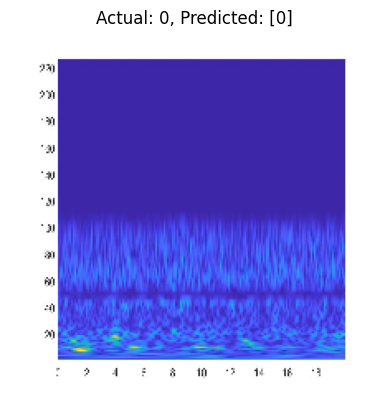

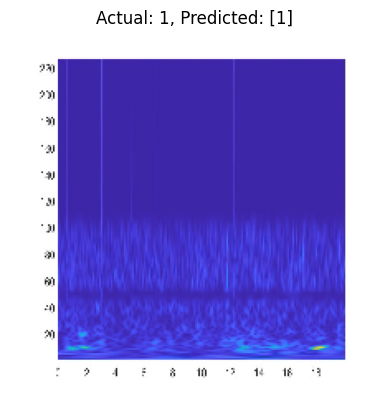

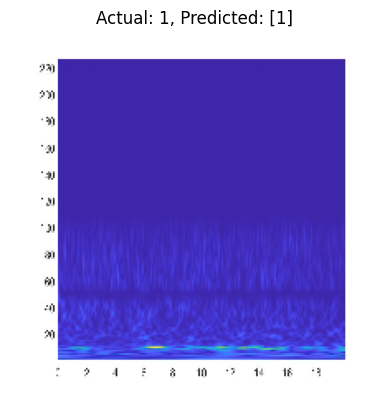

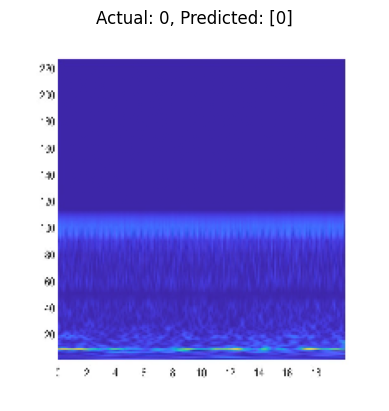

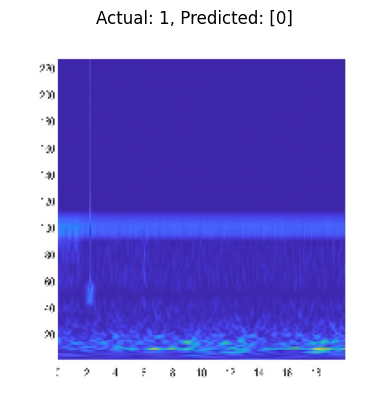

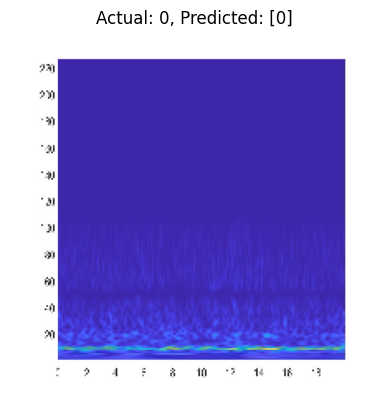

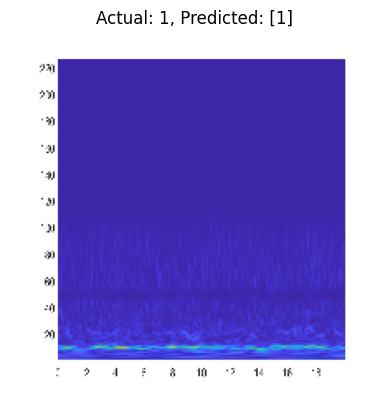

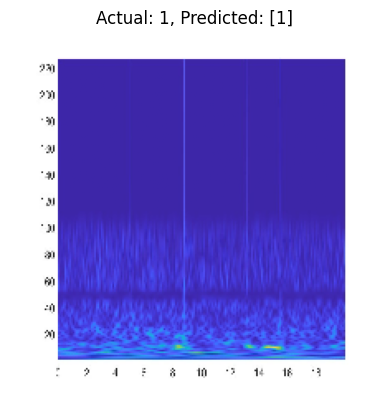

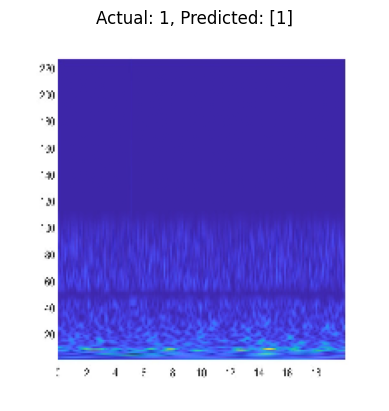

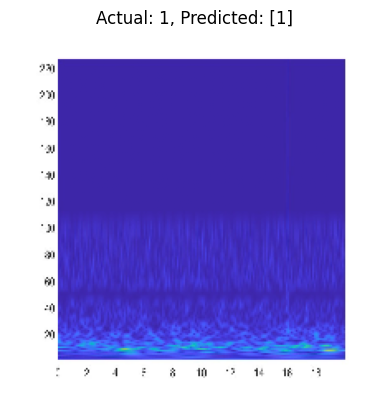

In [31]:
# Placeholder function for loading and preprocessing images
def load_and_preprocess_image(image_path):  # Function to load and preprocess an image
    img = keras_image.load_img(image_path, target_size=(224, 224))  # Load image with target size
    img_array = keras_image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch compatibility
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array  # Return preprocessed image

# Get true labels
true_labels = evaluation_generator.classes  # Get true labels from the evaluation generator

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)  # Get model predictions
predicted_labels = (evaluation_predictions > 0.5).astype(int)  # Convert predictions to binary labels

# Display images along with actual and predicted labels
for i in range(len(true_labels[:10])):  # Loop through the first 10 predictions
    image_path = evaluation_set['path'].iloc[i]  # Get image path
    actual_label = true_labels[i]  # Get the true label
    predicted_label = predicted_labels[i]  # Get the predicted label

    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)  # Call the function to preprocess the image

    # Display the image
    plt.imshow(image[0])  # Display the first image in the batch
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")  # Display actual and predicted labels
    plt.axis('off')  # Hide axes
    plt.show()  # Show the image


## Loading and Evaluating the Saved CNN Model on the Evaluation Set

In [ ]:
# Load the saved CNN model
loaded_model = load_model('Saved_Models/CNN_CWT_97_34.h5')  # Load the previously saved model

# evaluation set
evaluation_set = test_df  # Set the evaluation set to the test dataframe

# Evaluate the loaded model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(  # Create a generator to load the evaluation set
    dataframe=evaluation_set,  # Use the test dataframe
    x_col='path',  # Column containing image paths
    y_col='label',  # Column containing labels
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=batch_size,  # Set batch size
    seed=1234,  # Set random seed for reproducibility
    shuffle=False,  # Do not shuffle data for evaluation
    class_mode='binary'  # Set the class mode to binary for binary classification
)

# Evaluate the model
evaluation_loss, evaluation_accuracy = loaded_model.evaluate(evaluation_generator)  # Evaluate model on the evaluation set

print("Evaluation Loss:", evaluation_loss)  # Print the evaluation loss
print("Evaluation Accuracy:", evaluation_accuracy)  # Print the evaluation accuracy


Found 415 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9763 - loss: 0.0698
Evaluation Loss: 0.07587376981973648
Evaluation Accuracy: 0.9734939932823181


## Predicting Depression Treatment Response Using CNN and Suggesting Alternative Medications Using LLM (LLaMA 2)

In [ ]:
batch_size = 32  

# Load the saved CNN model
model = load_model('Saved_Models/CNN_CWT_97_34.h5')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 222, 222, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 12)   │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 220, 220, 12)   │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 580800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 580800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │       580,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581,983 (2.22 MB)

 Trainable params: 581,941 (2.22 MB)

 Non-trainable params: 40 (160.00 B)

 Optimizer params: 2 (12.00 B)

#### Nonresponder': 0, 'responder': 1

In [10]:
# Load and preprocess the input image
def preprocess_image(img_path, target_size=(224, 224)):  # Adjust target_size as per your CNN model
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize if required by your CNN model
    return img_array


In [ ]:
input_image_path = "Test_Images/rTMS_CWT_NR.jpg"
input_image = preprocess_image(input_image_path)
# Predict using the CNN model
prediction = model.predict(input_image)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


np.int64(0)

In [13]:
# If the prediction is "Non-Responder", suggest alternative medication using LLaMA 2
if predicted_class == 0:
    # Load the LLaMA 2 model using ctransformers
    from ctransformers import AutoModelForCausalLM

    # Path to the LLaMA 2 model
    llm_model_path = "models/llama-2-7b-chat.ggmlv3.q8_0.bin"

    # Load the LLaMA 2 model
    llm = AutoModelForCausalLM.from_pretrained(
        llm_model_path,
        model_type="llama",  # Specify the model type
        max_new_tokens=256,  # Maximum number of new tokens
        temperature=0.01     # Sampling temperature
    )

    # Define the prompt
    prompt = """
    A depression patient undergoing repetitive Transcranial Magnetic Stimulation (rTMS) treatment for moderate-to-severe depression has been classified as a Non-Responder by a CNN model.
    Non-Responder means the depression patient is not responding to rTMS treatment. 
    Suggest alternative medications or treatments that could be effective for moderate-to-severe depression.
    """

    # Generate a response
    response = llm(prompt)

    print("Alternative Medication Suggestions:")
    print(response)
    

Alternative Medication Suggestions:
1. Ketamine infusion: Ketamine has shown promise in treating depression, particularly in patients who have not responded to other treatments.
    2. ECT (Electroconvulsive Therapy): ECT is a safe and effective treatment for severe depression that has not responded to other treatments.
    3. Psychotherapy: Cognitive-behavioral therapy (CBT) and interpersonal therapy (IPT) are two types of psychotherapy that can be effective in treating depression.
    4. Antidepressant medication: Antidepressants such as SSRIs, SNRIs, and tricyclic antidepressants can be effective in treating depression.
    5. Mindfulness-based therapies: Mindfulness-based stress reduction (MBSR) and mindfulness-based cognitive therapy (MBCT) have shown promise in reducing symptoms of depression.
    6. Acupuncture: Acupuncture has been suggested as a potential treatment for depression, although more research is needed to confirm its effectiveness.
    7. Herbal supplements
